**THỰC HÀNH 1: ẢNH KỸ THUẬT SỐ & MÀU**

2.7. Lọc ảnh (Image Filter)

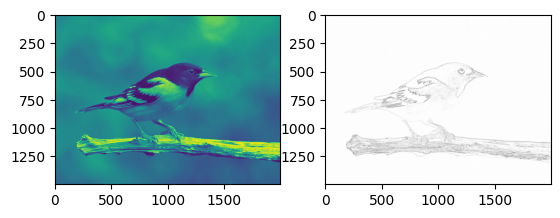

In [4]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode = "F")
b = filters.sobel(a).astype(np.uint8)
iio.imsave('bird_mean_filter.png',255-b)
#print(a)
#print(b)
plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(255-b,cmap='gray')
plt.show()

**BÀI TẬP:**

5. Viết chương trình sử dụng mean filter cho các hình trong thư mục Exercise

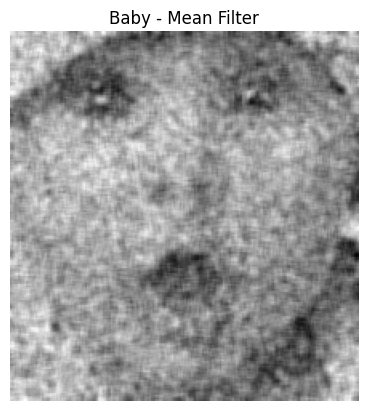

In [4]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt

a = iio.imread('exercise/baby.jpeg', mode='F')
k = np.ones((5,5))/25
b = sn.convolve(a, k)
b_uint8 = np.clip(b, 0, 255).astype(np.uint8)
iio.imwrite('exercise/baby_mean_filter.png', b_uint8)

plt.imshow(b_uint8, cmap='gray')
plt.axis('off')
plt.title('Baby - Mean Filter')
plt.show()

6. Viết chương trình sử dụng các filter khử nhiễu đã thực hành cho các hình trong thư mục Exercise. Cho biết filter nào khử nhiễu tốt nhất?

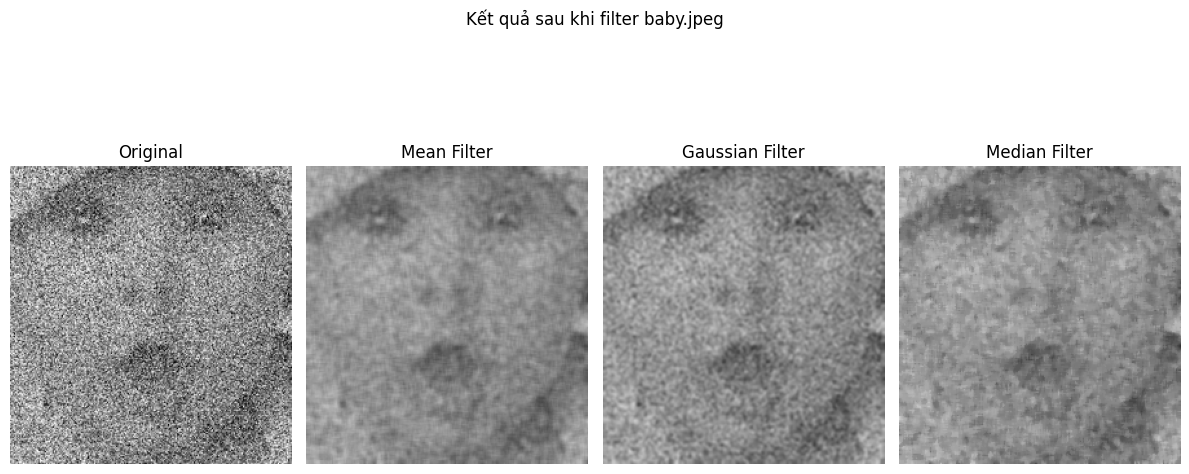

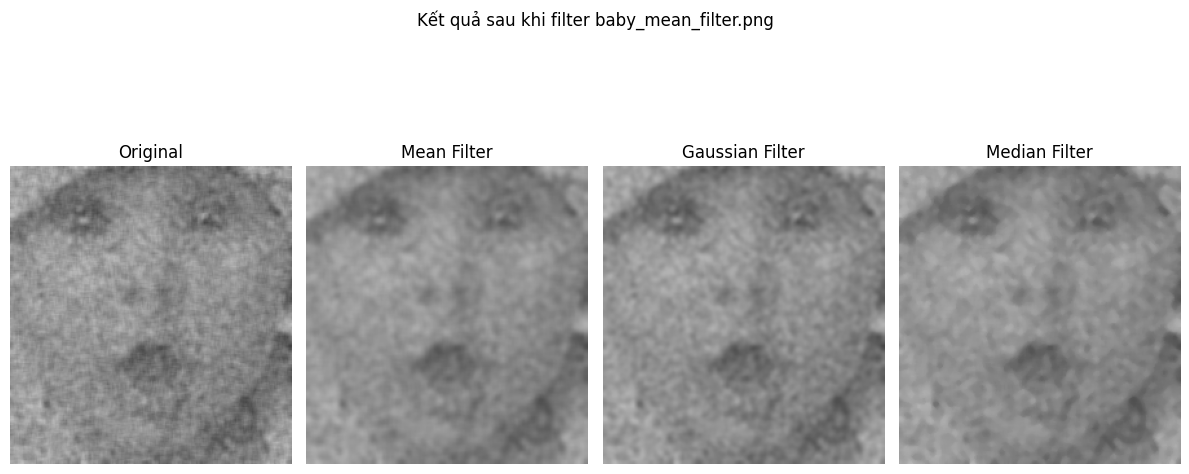

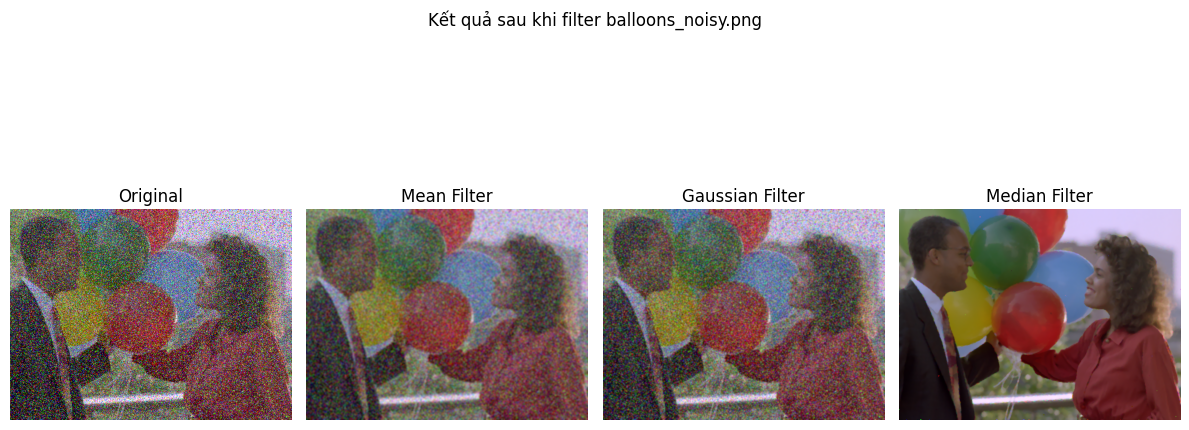

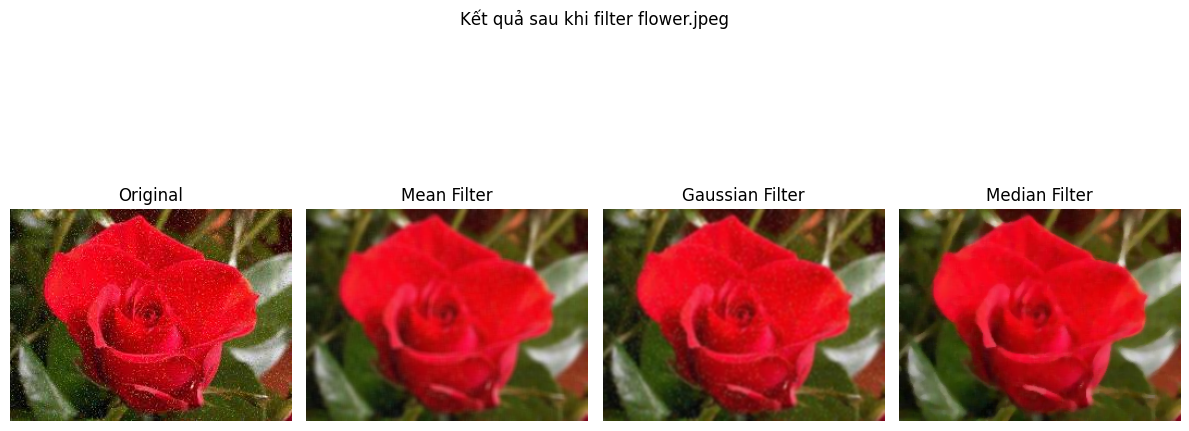

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

folder_path = "exercise"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
def apply_filters(img):
    mean_filtered = cv2.blur(img, (5, 5))
    gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)
    median_filtered = cv2.medianBlur(img, 5)
    return mean_filtered, gaussian_filtered, median_filtered

for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean, gaussian, median = apply_filters(img)
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Kết quả sau khi filter {image_file}")
    plt.subplot(1, 4, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(mean, cv2.COLOR_BGR2RGB))
    plt.title("Mean Filter")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Filter")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.title("Median Filter")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


7. Viết chương trình sử dụng các filter xác định biên của các hình trong thư mục Exercise. Lưu hình vào máy. (Khử nhiễu để xác định biên)

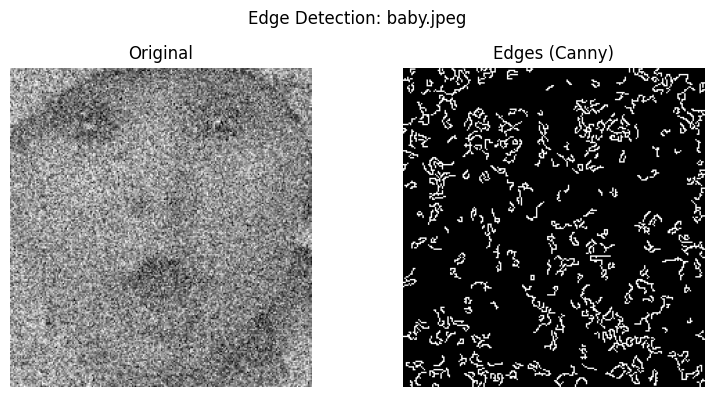

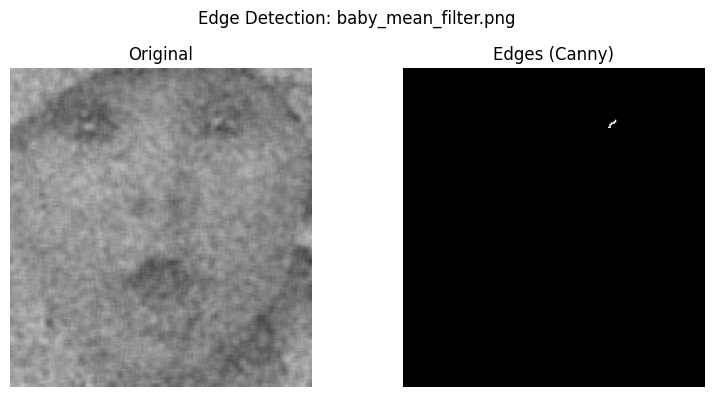

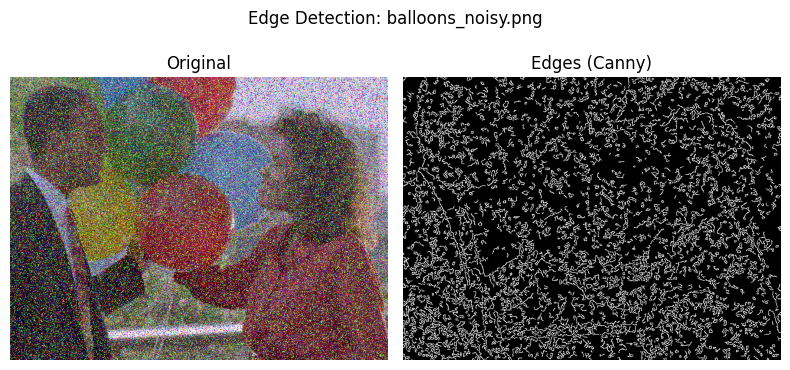

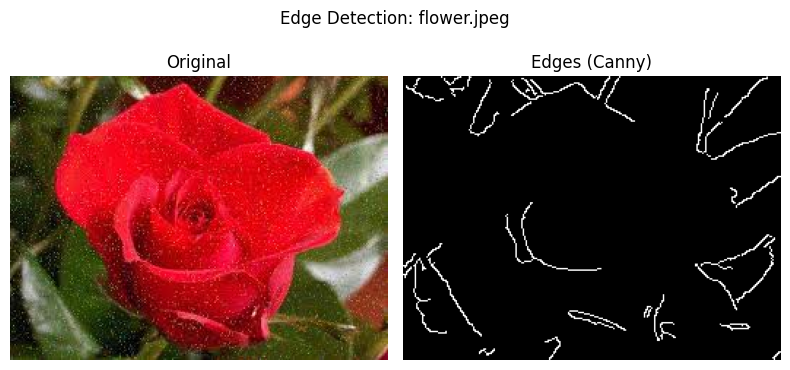

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

input_folder = "exercise"
output_folder = "output_edges"
os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for filename in image_files:
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, f"edge_{filename}")

    img = cv2.imread(input_path)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    cv2.imwrite(output_path, edges)
    plt.figure(figsize=(8, 4))
    plt.suptitle(f'Edge Detection: {filename}')
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Canny)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


8. Viết chương trình đổi màu RGB ngẫu nhiên của các hình trong thư mục Exercise. Lưu hình mới vào máy. (Khử nhiễu trước khi đổi màu)

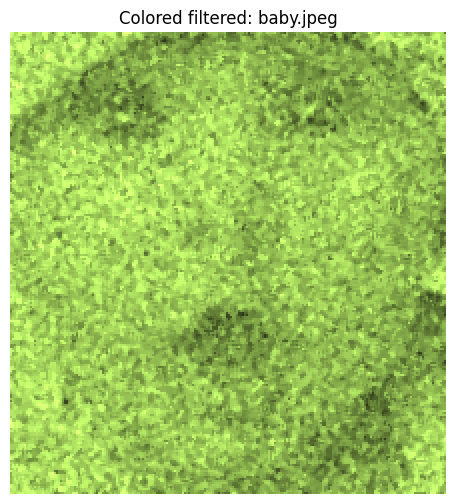

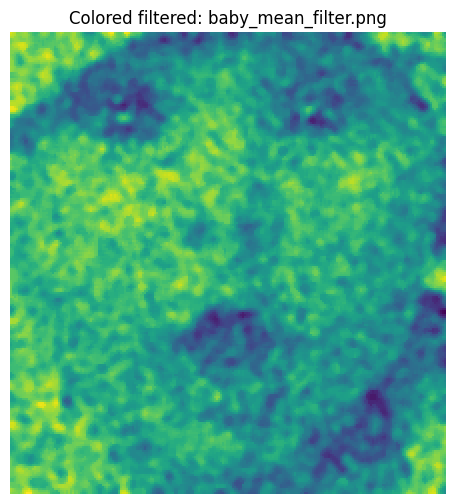

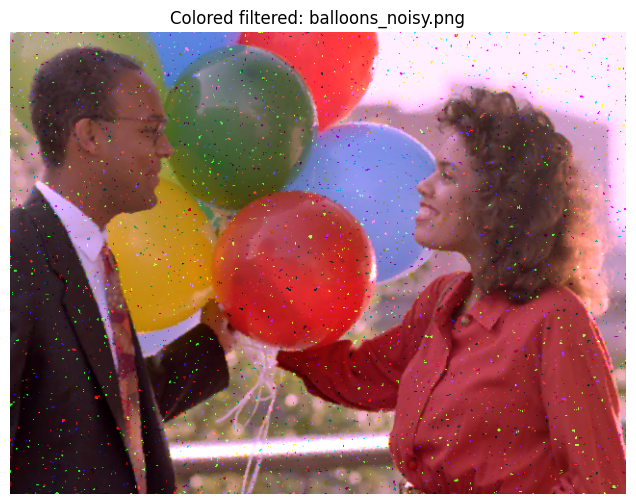

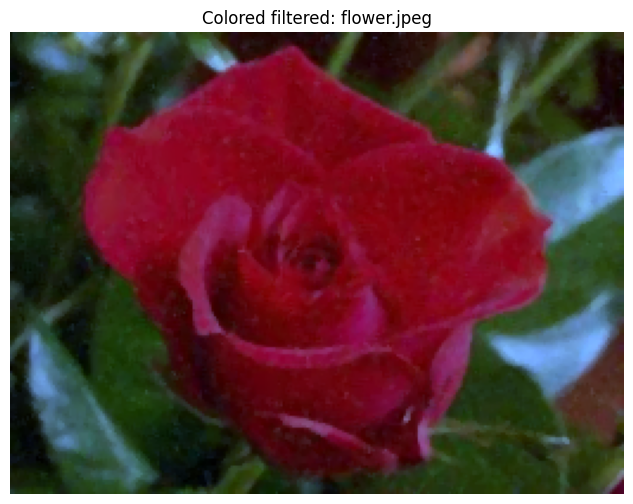

In [16]:
import os
import numpy as np
import imageio.v2 as iio
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'colored_filtered')
os.makedirs(output_folder, exist_ok=True)

def random_rgb_scale(image):
    if image.ndim != 3 or image.shape[2] != 3:
        return image
    
    scales = np.random.uniform(0.5, 1.5, size=3)
    new_img = np.empty_like(image, dtype=np.float32)
    for i in range(3):
        new_img[:, :, i] = image[:, :, i] * scales[i]
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)
    return new_img

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        filepath = os.path.join(input_folder, filename)
        image = iio.imread(filepath)
        
        if image.ndim == 3 and image.shape[2] == 3:
            filtered = np.empty_like(image)
            for c in range(3):
                filtered[:, :, c] = median_filter(image[:, :, c], size=3)
        else:
            filtered = median_filter(image, size=3)
        
        filtered_colored = random_rgb_scale(filtered)
        
        save_path = os.path.join(output_folder, f'colored_{filename}')
        iio.imwrite(save_path, filtered_colored)
        
        plt.figure(figsize=(8, 6))
        plt.title(f'Colored filtered: {filename}')
        plt.axis('off')
        plt.imshow(filtered_colored)
        plt.show()


9. Viết chương tình đổi màu HSV ngẫu nhưng không trùng của các hình trong thư mục Exercise. Lưu hình mới vào máy. (Khử nhiễu trước khi đổi màu)

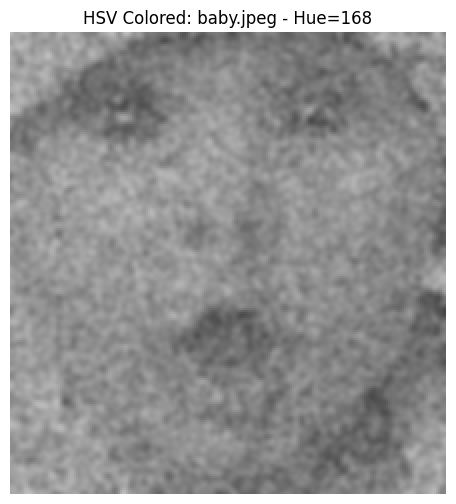

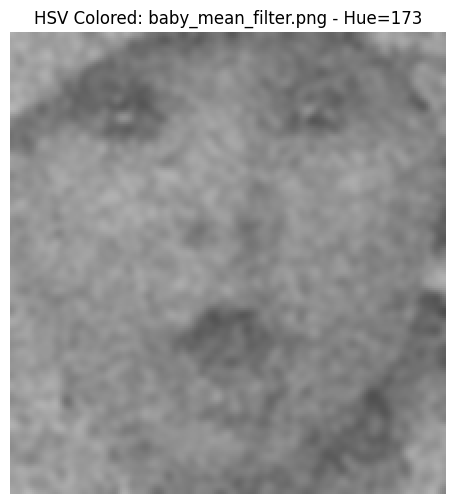

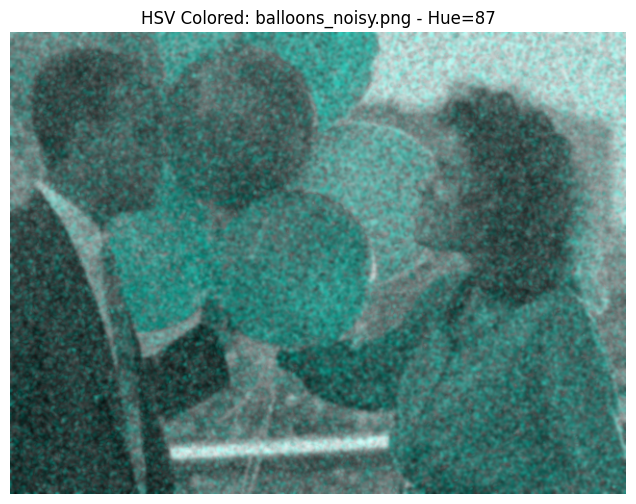

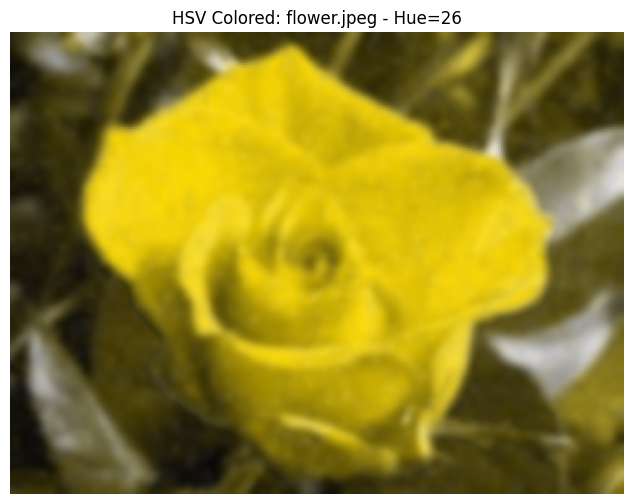

In [15]:
import os
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import random

input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'hsv_colored_filtered')
os.makedirs(output_folder, exist_ok=True)

used_hues = set()

def get_unique_hue():
    while True:
        h = random.randint(0, 179)
        if h not in used_hues:
            used_hues.add(h)
            return h

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        filepath = os.path.join(input_folder, filename)
        
        img = cv2.imread(filepath)
        if img is None:
            continue
        
        # Khử nhiễu bằng Gaussian filter từng kênh
        filtered = np.zeros_like(img)
        for c in range(3):
            filtered[:, :, c] = gaussian_filter(img[:, :, c], sigma=1.5)
        
        # Chuyển sang HSV
        hsv = cv2.cvtColor(filtered, cv2.COLOR_BGR2HSV)
        
        # Đổi H ngẫu nhiên không trùng
        new_hue = get_unique_hue()
        hsv[:, :, 0] = new_hue
        
        # Chuyển lại sang BGR
        colored_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        # Lưu ảnh
        save_path = os.path.join(output_folder, f'hsv_colored_{filename}')
        cv2.imwrite(save_path, colored_img)
        
        # Hiển thị (chuyển BGR -> RGB)
        plt.figure(figsize=(8,6))
        plt.title(f'HSV Colored: {filename} - Hue={new_hue}')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(colored_img, cv2.COLOR_BGR2RGB))
        plt.show()
